In [104]:
import autograd.numpy as np
from autograd import jacobian
from qutree import *

# Define the vector-valued function x(q)
def xy(q):
    r = q[0]
    phi = q[1]
    x1 = r*np.cos(phi)
    x2 = r*np.sin(phi)
    return np.array([x1, x2])

def polar(x):
    x1 = x[0]
    x2 = x[1]
    r = np.sqrt(x1**2 + x2**2)
    phi = np.arctan2(x2, x1)
    return np.array([r, phi])

def delta(x, a = 0.1):
    return np.sqrt(1./(a*np.pi)) * np.exp(-x**2/a)

N1 = 30
N2 = 30
x = Grid(linspace(0, 1, N1), 0)
y = Grid(linspace(0, 1, N1), 1)
r = Grid(linspace(0, np.sqrt(2.), N2), 2)
phi = Grid(linspace(0, 0.5*np.pi, N2), 3)

cart = x @ y
rphi = r @ phi

U = np.ndarray([N1]*2+[N2]*2)
print(rphi)

coords: [2 3]
grid:
[[0.02357023 0.02617994]
 [0.02357023 0.07853982]
 [0.02357023 0.13089969]
 ...
 [1.39064334 1.43989663]
 [1.39064334 1.49225651]
 [1.39064334 1.54461639]]


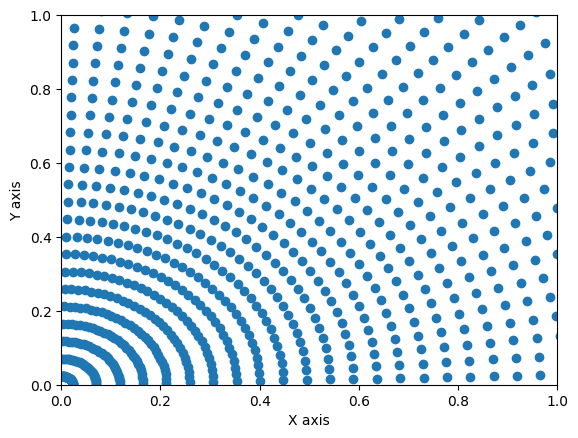

In [99]:
import matplotlib.pyplot as plt

# Example numpy 2D array of points
#points = cart.grid
points = rphi.evaluate(xy)

# Plotting the points
plt.scatter(points[:, 0], points[:, 1])
plt.xlim(0, 1.)
plt.ylim(0, 1.)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

65.23642806273214
(900,)
(900, 2)
[0.5 0.5]
5.641895835477563


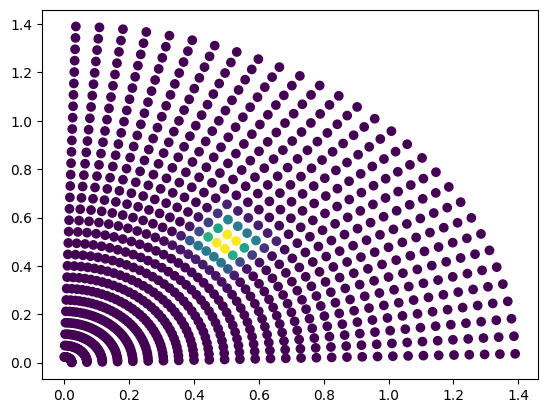

In [139]:
import plotly.graph_objects as go

def delta_point(q):
    x = np.array([0.5, 0.5])
    x2 = xy(q)
    dist = np.sum(np.abs(x-x2))
    return delta(dist, 0.01)

def delta_point_q(q):
    x = np.array([0.5, 0.5])
    q2 = polar(x)
    dist = np.sum(np.abs(q-q2))
    return delta(dist, 0.1)

q = Grid(rphi.evaluate(xy), [0, 1])
f = rphi.evaluate(delta_point)
print(np.sum(f))
print(f.shape)
print(q.grid.shape)
q0 = np.array([np.sqrt(2.)*0.5, 0.25*np.pi])
print(xy(q0))
print(delta_point(q0))

plt.scatter(q.grid[:, 0], q.grid[:, 1], c=f, cmap='viridis')

In [194]:

def delta_grid(xq):
    qu = xq[:2]
    x = xq[2:]
    x2 = xy(qu)
    return delta(np.sum(np.abs(x - x2)), 0.01)

all = rphi @ cart
print(all)
fall = all.evaluate(delta_grid)

coords: [2 3 0 1]
grid:
[[0.02357023 0.02617994 0.01666667 0.01666667]
 [0.02357023 0.02617994 0.01666667 0.05      ]
 [0.02357023 0.02617994 0.01666667 0.08333333]
 ...
 [1.39064334 1.54461639 0.98333333 0.91666667]
 [1.39064334 1.54461639 0.98333333 0.95      ]
 [1.39064334 1.54461639 0.98333333 0.98333333]]


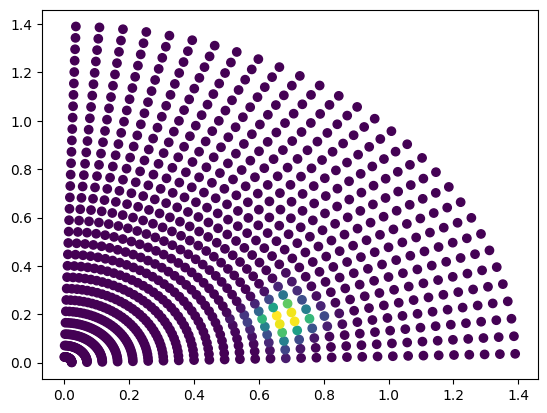

In [200]:
# reshape grid and function to 4D tensor (+coord dimension for grid)
allT = all.grid.reshape([N1, N1, N2, N2, 4])
fallT = fall.reshape([N1, N1, N2, N2])
# project onto a point in xy
px = 20
py = 5

allsnip = allT[:, :, px, py, :2].reshape([N1* N1, 2])
fallsnip = fallT[:, :, px, py].reshape([N1* N1])

plt.scatter(q.grid[:, 0], q.grid[:, 1], c=fallsnip, cmap='viridis')

In [202]:
trafo_T = fallT.transpose([0, 2, 1, 3])
trafo_T = trafo_T.reshape([N1*N2, N1*N2])
U, S, V = np.linalg.svd(trafo_T)

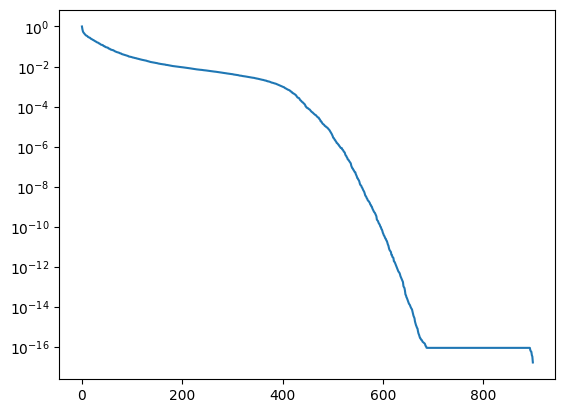

In [206]:
plt.plot(S/S[0])
plt.yscale('log')

In [ ]:
# linear transformation
def trafo_ab(x):
    a = 0.5 * (x[0] + x[1])
    b = 0.5 * (x[0] - x[1])
    return np.array([a, b])

